# Module 1, Notebook 1 - Wrangling ADNI Imaging and Outcome Data  





## Instructions

Please make a copy and rename it with your name (ex: Module1_NB1_Ilmi_Yoon). All grading points should be explored in the notebook but some can be done in a separate pdf file. 

*Graded questions will be listed with "Q:" followed by the corresponding points.* 

You will be submitting **a pdf** file containing **the url of your own Module1_NB1.**


---



# Introduction

## 1. Mounting and Accessing the Data

In [1]:
import numpy as np
import os
from pathlib import Path
import glob
import pandas as pd
from collections import Counter
import math
from tqdm import tqdm

In [2]:
from google.colab import drive

Because we are working on data stored in Google Drive, the following steps will need to be taken: 
1. Mount Google drive through using drive.mount('/content/drive')
2. Ceate a shortcut your personal Google Drive home directory to the location where the data is through: 
  * Navigating to https://drive.google.com/
  * Click "My Drive" 
  * Click the "+ New" button, add folder, and name it Data_Shortcut. This will be the place you can access to the data.
  * From drive.google.com, navigate to "Shared with me", click on rev3, CS509_Data
  * Right click on Module1_ADNI and click "Add shortcut to drive" 
  * Add to the Data_Shortcut you just created in MyDrive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
DATA_PATH = Path('/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/')

We want to make sure we've mounted the data properly and that there are a good number of patients in the PET data folder: 

In [7]:
num_pts = len(os.listdir(Path(DATA_PATH,'FDGPET', 'ADNI')))
print(f'There are {num_pts} patients in the folder')

There are 523 patients in the folder


Here, we want to see if we can get the cognitive group or specific outcomes for the patients that are in the folder. In order to do that, we downloaded a CSV file associated with the PET data from the ADNI website. List the files in the CSV directory below and read them in, inspect the columns and rows of the CSV file: 

In [8]:
os.listdir(Path(DATA_PATH, 'CSVS',))

['ADNI_PET_MiddleSlices_UniformResolution_Averages.csv',
 'ADNI_2_AV45_base_10_01_2021.csv',
 'ADNI2_3_base_screen_AV45_10_08_2021.csv',
 'adnim.csv',
 'ADNI_Amyloid_Status_AV45_KAIST.csv',
 'ADNI_Amyloid_Status_UPenn_UCBerkeley.csv',
 'ADNI_PET_MiddleSlices_ClinicalData.csv']

In [10]:
data_df = pd.read_csv(Path(DATA_PATH,'CSVS/FDG_PET_CN_AD_12_07_2021.csv'))

In [11]:
data_df.shape

(1501, 12)

In [12]:
data_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I1479867,941_S_6962,AD,F,75,2,PET,PET Brain DYNAMIC 6x5MIN FDG,Original,8/10/2021,DCM,12/02/2021
1,I1295819,941_S_6854,AD,M,86,2,PET,ADNI3-BRAIN FDG,Original,2/24/2020,DCM,12/02/2021
2,I283469,941_S_4376,CN,F,77,23,PET,ADNI Brain PET: Raw FDG,Original,2/08/2012,DCM,12/02/2021
3,I274743,941_S_4365,CN,M,80,23,PET,ADNI Brain PET: Raw FDG,Original,12/30/2011,DCM,12/02/2021
4,I420334,941_S_4365,CN,M,83,30,PET,ADNI Brain PET: Raw FDG,Original,4/16/2014,DCM,12/02/2021


Below, I want to see if the patients in the PET folder are in in the CSV file that we downloaded: 

In [15]:
pt_in_csv = []
for patient_id in os.listdir(DATA_PATH/'FDGPET'/'ADNI'): 
  if patient_id in data_df.Subject.tolist():
    pt_in_csv.append("yes")
  else: 
    pt_in_csv.append('no')
Counter(pt_in_csv)

Counter({'yes': 523})

In [17]:
print('There are ' + str(len(glob.glob(str(Path(DATA_PATH, 'FDGPET','ADNI', '*', '*')))))+ ' files in the in the patient folders')

There are 668 files in the in the patient folders


So there are multiple PET images files in each folder. Let's see what kinds of PET there are. 

## 2. Investigating the types of imaging data

In [18]:
Counter([x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH, 'FDGPET','ADNI', '*', '*')))]).most_common()

[('ADNI_Brain_PET__Raw_FDG', 66),
 ('ADNI_Brain_PET__Raw', 39),
 ('ADNI_Static_Brain__6x5_', 22),
 ('30_min_3D_FDG_4i_16s', 18),
 ('30_MIN_3D_FDG_4i_16s', 13),
 ('ADNI_3D_Brain_ITERATIVE__FDG', 13),
 ('30MIN_3D_FDG_4i_16s', 12),
 ('ADNI_ITERATIVE_FDG', 11),
 ('ADNI2_FDG__AC_', 11),
 ('30-60_min_dynamic-3D_4i_16s__FDG', 11),
 ('ADNI_FDG_Brain_30min_dyn', 11),
 ('ADNI__AC___FDG', 11),
 ('ADNI_STATIC_BRAIN__6X5_', 10),
 ('ADNI_BRAIN_3D__FDG', 9),
 ('30_min_3D_FDG__4i_16s', 9),
 ('PET_WB', 8),
 ('Dyn_ADNI-GO_128x,4i20s,256mmFOV,NoFilter___FDG', 8),
 ('30_min_3D_FDG_-_Iter_Brain_Mode', 8),
 ('ADNI_FDG_6F_4i_16s', 8),
 ('ADNI_AC_FDG', 8),
 ('3D_Brain', 7),
 ('PET_Brain_FDG', 7),
 ('ADNI-2-FDG', 7),
 ('fdg_4i_16s__FDG', 7),
 ('30_min_FDG_4i_16s', 6),
 ('ADNI_STATIC_BRAIN', 6),
 ('30-60_min_dynamic-3D_-_Iter__FDG', 6),
 ('60min_Dyn_FDG_4i_16s', 5),
 ('PET_AC_3D_Brain_ADNI-GO_FDG', 5),
 ('EMISSION-ADNI_4i_16s__FDG', 5),
 ('TRANSAXIAL_BRAIN_3D_FDG_IR_CTAC_NF', 5),
 ('FDG_Dyn_6x5min_2Di_336_2z_Al

Looks like there are two main types: Some that have the word "dynamic" and some that have the word "averaged". What else do you notice about the differences among the different PET image types? (1 point) 
________________________________________________________________________________________________________________________________________________________________
Below, search for the patients with the greatest variety of images: 

In [19]:
for patient in os.listdir(Path(DATA_PATH, 'FDGPET','ADNI',)): 
  if len(os.listdir(Path(DATA_PATH, 'FDGPET','ADNI',patient))) > 3: 
    print(patient, len(os.listdir(DATA_PATH/'FDGPET'/'ADNI'/patient)))

024_S_0985 4
127_S_0259 6
021_S_0647 4
127_S_0754 4
003_S_1059 4
130_S_0232 4
126_S_0680 5
009_S_0751 5


Let's use the first patient and compare 

In [20]:
patient_id_test = '127_S_0259'
os.listdir(DATA_PATH/'FDGPET'/'ADNI'/patient_id_test)

['30-60_min_dynamic-3D_4i_16s_FDG',
 '30-60_min_dynamic-3D_-_Iter__FDG',
 '30_min_3D_FDG_4i_16s',
 'ADNI_STATIC_BRAIN__6x5_',
 '30-60_min_dynamic-3D_4i_16s__FDG',
 '127_S_0259_fdg']

In [58]:
image_type_to_test = 'ADNI_STATIC_BRAIN__6x5_'

In [59]:
## Looking at the files, picking one of the descriptions above and looking at the file structure: 
glob.glob(str(Path(DATA_PATH,'FDGPET', 'ADNI',patient_id_test,image_type_to_test, '*', '*', '*', )))[0]

'/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/127_S_0259/ADNI_STATIC_BRAIN__6x5_/2007-04-20_13_48_59.0/I49952/ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103402869_132_S30122_I49952.dcm'

In [62]:
len(glob.glob(str(Path(DATA_PATH,'FDGPET', 'ADNI',patient_id_test,image_type_to_test, '*', '*', '*', ))))

210

Looks like the structure is as follows: 


`<root_path>/Module1_ADNI/FDGPET/ADNI/<patient_id>/<image_type>/<date>/<Series>/<full_image_name>.dcm`

Let's see how many dates, series, and DICOM images there are in this particular image_type: 



In [63]:
print('The number of dates in this image type is: '+ str(len(glob.glob(str(Path(DATA_PATH,'FDGPET', 'ADNI',patient_id_test,image_type_to_test, '*', ))))), 
      ' and they are: ', [x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH,'FDGPET', 'ADNI',patient_id_test,image_type_to_test, '*', )))])

The number of dates in this image type is: 1  and they are:  ['2007-04-20_13_48_59.0']


In [64]:
date_test = [x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH,'FDGPET','ADNI',patient_id_test,image_type_to_test, '*', )))][0]
image_series_test = [x.split('/')[-1] for x in glob.glob(str(Path(DATA_PATH,'FDGPET','ADNI',patient_id_test,image_type_to_test, date_test,'*' )))][0]


In [65]:
## In a single series, it looks like the DICOMs are numbered by their slice based on third to last element in the slice name.
os.listdir(Path(DATA_PATH,'FDGPET','ADNI',patient_id_test,image_type_to_test, date_test,image_series_test ))[:30]

['ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103402869_132_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103356885_127_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103348479_120_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103201696_26_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103400447_130_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103330010_103_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103421354_151_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103458698_172_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103328853_102_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_raw_20070423103540792_197_S30122_I49952.dcm',
 'ADNI_127_S_0259_PT_ADNI_STATIC_BRAIN__6x5___br_ra

In [66]:
len(os.listdir(Path(DATA_PATH,'FDGPET','ADNI',patient_id_test,image_type_to_test, date_test,image_series_test )))

210

These files all have the extension ".dcm", which means that it's a DICOM file. These types of files have both pixel data and meta-data associated with the pixel data (image). Therefore, they require a special reader in python. A quick google search will tell you to use pydicom, but Colab doesn't have that pre-installed. We'll install it below: 

In [67]:
!pip install pydicom

In [68]:
import pydicom
import matplotlib.pyplot as plt

In [69]:
## Using the _30_ tag as a potential indicator that it's the slice at the center of the volume
first_dicom_dataset = pydicom.dcmread(glob.glob(str(Path(DATA_PATH,'FDGPET','ADNI',patient_id_test,image_type_to_test, date_test, image_series_test, '*_45_*')))[0])

In [70]:
## Looking at the components of a Dicom image/dataset: 
first_dicom_dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Positron Emission Tomography Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.02616612684992636474
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.3181266211547127779
(0002, 0016) Source Application Entity Title     AE: 'UWMOWS'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 494
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY']
(0008, 0012) Instance Creation Date              DA: '20070423'
(0008, 0013) Instance Creation Time              TM: '093647.000'
(0008, 0014) Ins

When you view the variable, you'll notice different numerical "tags". Each tag keeps a unique data field. Some important DICOM data fields for PET images include: 

*   Series Description
*   Radiopharmaceutical
*   Pixel Data 

You can usually find nearly any information you're looking for with respect to the image acqusition in these DICOM fields. Since some of these are manually input into the scanner, it is possible that the data field is subject to error. Let's access some of the tags and then look at the image: 


In [71]:

## If we want to know the institution that this DICOM image was acquired at, 
## you can access a tag by its numerical value like this: 
first_dicom_dataset[0x8, 0x80]
## Note that we have to use 0x<number> format; otherwise Python won't know 
## the 0s preceding the code exist.

(0008, 0080) Institution Name                    LO: 'UW-Madison, PET Imaging Center'

In [72]:

## You can also use the name of the element: 
first_dicom_dataset['InstitutionName']

(0008, 0080) Institution Name                    LO: 'UW-Madison, PET Imaging Center'

In [73]:
## Or if you want the value only: 
first_dicom_dataset.InstitutionName

'UW-Madison, PET Imaging Center'

Now let's look at the image itself, which is located at the "pixel_array" element of the DICOM dataset: 

In [74]:
first_dicom_dataset.pixel_array.shape

(128, 128)

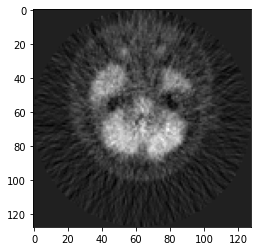

In [75]:
plt.imshow(first_dicom_dataset.pixel_array, cmap = 'gray')

Let's confirm that the `_45_` number in the file name corresponds to the slice number. To do that, let's load the dicom slice datasets into a dictionary with the key as this identifier, then sort the keys & plot the slices: 

In [76]:
def read_all_dicom_slices(dicom_directory, 
                         ):
  """
  Will read in the images from a single dicom folder and return a dictionary of 
  those images with the key as the presumed slice number, and the value being the pixel array. 
  
  dicom_directory: Path or string that leads to the folder containing the slices 

  """
  dicom_image_dict = {}
  for image in glob.glob(str(Path(dicom_directory, '*'))): 
    key = image.split('/')[-1].split('_')[-3]
    dicom_image_dict[key]= pydicom.dcmread(image)
  return dicom_image_dict

In [77]:
first_dicom_dir =  Path(DATA_PATH,'FDGPET','ADNI',patient_id_test,image_type_to_test, date_test, image_series_test)
first_dicom_volume = read_all_dicom_slices(first_dicom_dir)


In [78]:
def visualize_dicom_volume(dicom_volume: dict): 
  """
  Takes a dicom volume, gives them the proper titles. 
  dicom_volume,  e.g. {'1': <pixel_data>, ...}
  output is to plot an appropriate size image of the voulme that one is interested in. 
  """
  num_rows = math.ceil(len(dicom_volume.keys())/5)
  keys_sorted = [str(x) for x in sorted([int(x) for x in list(dicom_volume.keys())])]
  plt.figure(figsize = (20, 15*num_rows))
  for i, key in enumerate(keys_sorted): # iterates through the dictionary, while the enumerate function keeps track of the index with i
      plt.subplot(5*num_rows,5,i+1)    # the number of images in the grid 
      value = dicom_volume[key]
      img = value.pixel_array
      plt.imshow(img, cmap= 'gray')
      plt.axis('off')
      plt.title(key)
  plt.show()

In [79]:
visualize_dicom_volume(first_dicom_volume)

Output hidden; open in https://colab.research.google.com to view.

They do NOT look ordered nor as though the slice number corresponds pretty well with the way that it's named. 

In [80]:
uniform_path_list = glob.glob(str(Path(DATA_PATH,'FDGPET','ADNI', '*', '*', '*', '*')))

In [81]:
uniform_path_list.sort()

In [82]:

uniform_path_list[:10]

['/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_0295/ADNI_Brain_PET__Raw_FDG/2011-06-09_08_23_48.0/I239487',
 '/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_0413/ADNI_Brain_PET__Raw_FDG/2013-05-14_08_16_10.0/I384425',
 '/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_0685/ADNI_Brain_PET__Raw_FDG/2010-07-27_08_37_48.0/I187652',
 '/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_0685/ADNI_Brain_PET__Raw_FDG/2012-08-02_08_37_38.0/I321228',
 '/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_1261/ADNI_Brain_PET__Raw_FDG/2011-03-01_08_45_24.0/I221695',
 '/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_1261/ADNI_Brain_PET__Raw_FDG/2013-03-07_08_14_14.0/I363184',
 '/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_1280/ADNI_Brain_PET__Raw_FDG/2011-05-06_08_49_00.0/I233918',
 '/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_4213/ADNI_Bra

Creating a CSV file from these middle slices: 

In [87]:
filepath_df = pd.DataFrame({'FILEPATH_FDGPET_DICOM_FOLDER': [x for x in uniform_path_list]})

In [88]:
filepath_df.loc[0, 'FILEPATH_FDGPET_DICOM_FOLDER']


'/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/FDGPET/ADNI/002_S_0295/ADNI_Brain_PET__Raw_FDG/2011-06-09_08_23_48.0/I239487'

In [91]:
filepath_df['AVG_OR_DYN'] = ['dyn' if 'dyn' in x.lower() else 'avg' for x in filepath_df.FILEPATH_FDGPET_DICOM_FOLDER]
filepath_df.AVG_OR_DYN.value_counts()

avg    890
dyn     97
Name: AVG_OR_DYN, dtype: int64

In [93]:

DATA_PATH

PosixPath('/content/drive/MyDrive/Data_Shortcut/Module1_ADNI')

In [94]:
filepath_df.to_csv(Path(DATA_PATH, 'CSVS', 'ADNI_FDGPET_FILEPATH_TO_DICOM_FOLDER.csv'))

Add in some of the clinical characteristics/outcomes that we had in the original patient dataframe to the filepath df: 

In [96]:
data_df.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,I1479867,941_S_6962,AD,F,75,2,PET,PET Brain DYNAMIC 6x5MIN FDG,Original,8/10/2021,DCM,12/02/2021
1,I1295819,941_S_6854,AD,M,86,2,PET,ADNI3-BRAIN FDG,Original,2/24/2020,DCM,12/02/2021
2,I283469,941_S_4376,CN,F,77,23,PET,ADNI Brain PET: Raw FDG,Original,2/08/2012,DCM,12/02/2021
3,I274743,941_S_4365,CN,M,80,23,PET,ADNI Brain PET: Raw FDG,Original,12/30/2011,DCM,12/02/2021
4,I420334,941_S_4365,CN,M,83,30,PET,ADNI Brain PET: Raw FDG,Original,4/16/2014,DCM,12/02/2021


In [97]:
filepath_df.head()

,FILEPATH_FDGPET_DICOM_FOLDER,AVG_OR_DYN
0,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg
1,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg
2,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg
3,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg
4,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg


In [99]:
filepath_df['PTID'] = [x.split('/')[8] for x in filepath_df.FILEPATH_FDGPET_DICOM_FOLDER]
filepath_df.PTID.value_counts()

005_S_0610    7
131_S_0123    7
127_S_0259    7
027_S_0074    7
941_S_1202    6
             ..
003_S_4119    1
128_S_5123    1
098_S_4201    1
009_S_5252    1
036_S_4820    1
Name: PTID, Length: 509, dtype: int64

Going to check and see if there are duplicated patients in this PET data: 

In [100]:
filepath_df.PTID.duplicated().value_counts()

False    509
True     478
Name: PTID, dtype: int64

In [101]:

filepath_df.shape

(987, 3)

In [102]:
data_df.Subject.duplicated().value_counts()

True     845
False    656
Name: Subject, dtype: int64

In [103]:
data_df = data_df.loc[~data_df.Subject.duplicated()]

In [104]:
consolidated_data_df = filepath_df.merge(data_df, left_on=['PTID'], right_on = 'Subject', how = 'left')

In [105]:
consolidated_data_df.shape

(987, 15)

In [106]:
consolidated_data_df.head()

,FILEPATH_FDGPET_DICOM_FOLDER,AVG_OR_DYN,PTID,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded
0,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg,002_S_0295,I239487,002_S_0295,CN,M,90,26,PET,ADNI Brain PET: Raw FDG,Original,6/09/2011,DCM,12/02/2021
1,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg,002_S_0413,I240813,002_S_0413,CN,F,82,26,PET,ADNI Brain PET: Raw FDG,Original,6/17/2011,DCM,12/02/2021
2,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg,002_S_0685,I187652,002_S_0685,CN,F,94,10,PET,ADNI Brain PET: Raw FDG,Original,7/27/2010,DCM,12/02/2021
3,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg,002_S_0685,I187652,002_S_0685,CN,F,94,10,PET,ADNI Brain PET: Raw FDG,Original,7/27/2010,DCM,12/02/2021
4,/content/drive/MyDrive/Data_Shortcut/Module1_A...,avg,002_S_1261,I221695,002_S_1261,CN,F,75,10,PET,ADNI Brain PET: Raw FDG,Original,3/01/2011,DCM,12/02/2021


Our outcome will be the diagnosis which is indicated by the DX column. Let's see what the counts of diagnosis are: 

In [107]:
consolidated_data_df.Group.value_counts()

CN    621
AD    366
Name: Group, dtype: int64

In [109]:

Path(DATA_PATH, 'CSVS', 'ADNI_FDGPET_FILEPATH_TO_DICOM_FOLDER_ClinicalData.csv')

PosixPath('/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/CSVS/ADNI_FDGPET_FILEPATH_TO_DICOM_FOLDER_ClinicalData.csv')

In [ ]:
os.listdir('/content/drive/MyDrive/Data_Shortcut/')

['Module2_BraTS', 'Module1_ADNI', 'csvs']

In [110]:
consolidated_data_df.to_csv(Path('/content/drive/MyDrive/Data_Shortcut/Module1_ADNI/CSVS', 'ADNI_FDGPET_FILEPATH_TO_DICOM_FOLDER_ClinicalData.csv'))

In [111]:
consolidated_data_df.Group.value_counts()

CN    621
AD    366
Name: Group, dtype: int64

In [ ]:

# [print(x) for x in consolidated_data_df['FILEPATH_MIDDLE_SLICES']];

To check, I'm going to look at the PET images from a few cognitively normal patients: 

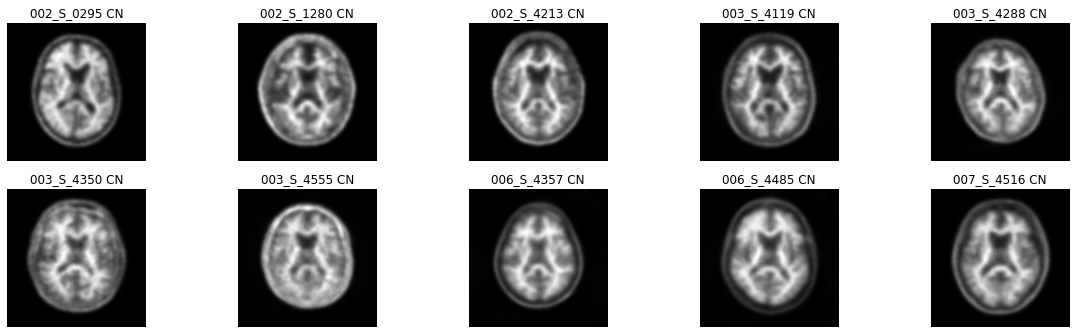

In [ ]:
num_patients_visualize = 10
num_rows = math.ceil(num_patients_visualize/5)
plt.figure(figsize = (20, 15*num_rows))
CN_df = consolidated_data_df.loc[consolidated_data_df.Group == 'CN'].copy().reset_index(drop = True)
for i, row in CN_df[:num_patients_visualize].iterrows(): # iterates through the dictionary, while the enumerate function keeps track of the index with i
    plt.subplot(5*num_rows,5,i+1)    # the number of images in the grid 
    dicom_ds = pydicom.dcmread(row['FILEPATH_MIDDLE_SLICES'])
    img = dicom_ds.pixel_array
    plt.imshow(img, cmap= 'gray')
    plt.axis('off')
    plt.title(row['PTID']+' '+row['Group'])
plt.show()


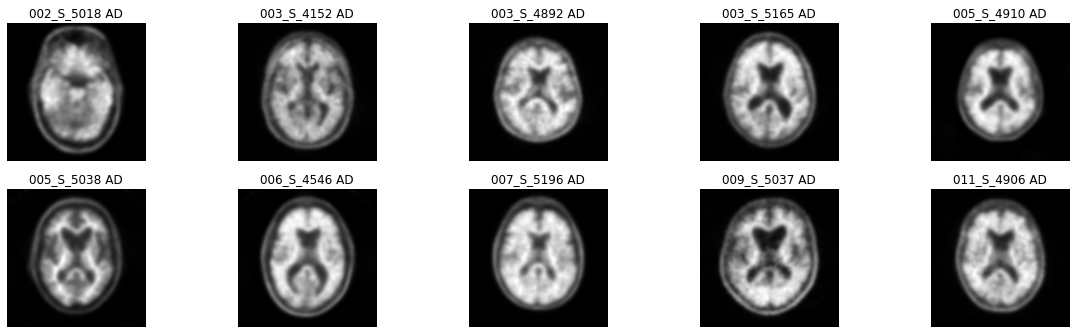

In [ ]:
num_patients_visualize = 10
num_rows = math.ceil(num_patients_visualize/5)
plt.figure(figsize = (20, 15*num_rows))
AD_df = consolidated_data_df.loc[consolidated_data_df.Group == 'AD'].copy().reset_index(drop = True)
for i, row in AD_df[:num_patients_visualize].iterrows(): # iterates through the dictionary, while the enumerate function keeps track of the index with i
    plt.subplot(5*num_rows,5,i+1)    # the number of images in the grid 
    dicom_ds = pydicom.dcmread(row['FILEPATH_MIDDLE_SLICES'])
    img = dicom_ds.pixel_array
    plt.imshow(img, cmap= 'gray')
    plt.axis('off')
    plt.title(row['PTID']+' '+row['Group'])
plt.show()


I see a general "hotter" trend in the AD patients. The next step will be to let the algorithm decide which "hot" features are useful for predicting AD from CN patients. 

# Next steps
Break into groups and 
1. 
